In [868]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [869]:

url = "https://www.sharkattackfile.net/spreadsheets/GSAF5.xls"
df = pd.read_excel(url)

In [870]:
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,11th October,2025.0,Unprovoked,Australia,Queensland,Cook Esplanade Thursday Island,Fishing/swimming,Samuel Nai,M,14,...,Tiger or Bull shark,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7th October,2025.0,Unprovoked,Australia,South Australia,Kangaroo Island,Surfing,Lee Berryman,M,50+,...,Bronze whaler?,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29th September,2025.0,Unprovoked,USA,Off California,Catalina Island,Swimming,Christopher Murray,M,54,...,unknown 1.2m shark,Todd Smith: Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27th September,2025.0,Provoked,Costa Rica,NaN,Cocos Islands,Diving-Tagging sharks,Dr. Mauricio Hoyos,M,48,...,Tiger shark 4m,Todd Smith: Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6th September,2025.0,Unprovoked,Australia,NSW,Long Reef Sydney,Surfing,Mercury Psillaskis,M,57,...,Great White Shark,Todd Smith: Andy Currie: Simon De Marchi: Kevi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [871]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7049 non-null   object 
 1   Year            7047 non-null   float64
 2   Type            7031 non-null   object 
 3   Country         6999 non-null   object 
 4   State           6563 non-null   object 
 5   Location        6482 non-null   object 
 6   Activity        6464 non-null   object 
 7   Name            6830 non-null   object 
 8   Sex             6470 non-null   object 
 9   Age             4055 non-null   object 
 10  Injury          7014 non-null   object 
 11  Fatal Y/N       6488 non-null   object 
 12  Time            3523 non-null   object 
 13  Species         3918 non-null   object 
 14  Source          7029 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href            6796 non-null   o

In [872]:
df.shape

(7049, 23)

In [873]:
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [874]:
columnas_eliminadas = ['State', 'Location', 'Name', 'Injury', 'Time', 'Year','Source','pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23', 'Case Number', 'Unnamed: 21']

for col in columnas_eliminadas:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

print("Columnas eliminadas.")

Columnas eliminadas.


In [875]:
df = df.drop_duplicates()
print("Duplicados eliminados. Filas restantes:", df.shape[0])

Duplicados eliminados. Filas restantes: 7021


In [876]:
df = df.dropna(how="all")
print("Filas completamente vacías eliminadas.")

Filas completamente vacías eliminadas.


In [877]:
df.head()

,Date,Type,Country,Activity,Sex,Age,Fatal Y/N,Species
0,11th October,Unprovoked,Australia,Fishing/swimming,M,14,N,Tiger or Bull shark
1,7th October,Unprovoked,Australia,Surfing,M,50+,N,Bronze whaler?
2,29th September,Unprovoked,USA,Swimming,M,54,N,unknown 1.2m shark
3,27th September,Provoked,Costa Rica,Diving-Tagging sharks,M,48,N,Tiger shark 4m
4,6th September,Unprovoked,Australia,Surfing,M,57,Y,Great White Shark


In [878]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '_')

In [879]:
if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'], errors='coerce')

/var/folders/jv/lpcmj8m91yggsl2fvg3tnx2w0000gn/T/ipykernel_15542/1668207057.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [880]:
df['date'].head()


0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: date, dtype: datetime64[ns]

In [881]:
print(df['date'].isnull().sum())

895


In [882]:
median_date = df['date'].median()
df['date'] = df['date'].fillna(median_date)

In [883]:
print(df['date'].isnull().sum())

0


In [884]:
df['date'] = df['date'].dt.date

In [885]:
print(df['date'].head())

0    1992-08-17
1    1992-08-17
2    1992-08-17
3    1992-08-17
4    1992-08-17
Name: date, dtype: object


Hasta aquí el formato fechas acabado.

In [886]:
df['type'] = df['type'].astype(str).str.strip().str.lower()

In [887]:
df['type'].value_counts(dropna=False)

type
unprovoked             5181
provoked                638
invalid                 552
watercraft              354
sea disaster            241
questionable             26
nan                      18
boat                      7
?                         1
unconfirmed               1
unverified                1
under investigation       1
Name: count, dtype: int64

In [888]:
mapeo_type = {
    'unprovoked': 'unprovoked',
    'provoked': 'provoked',
    'boat': 'non-attack',
    'sea disaster': 'non-attack',
    'post-mortem bite': 'non-attack',
    'invalid': 'invalid',
    'questionable': 'questionable',
    'probable': 'questionable',
    'unconfirmed': 'questionable',
    'unconfirmed incident': 'questionable',
    'unconfirmed attack': 'questionable',
    'under investigation': 'questionable',
    'unknown': 'unknown',
    'nan': 'unknown',
    'none': 'unknown',
    'other': 'unknown'
}

In [889]:
df['type'] = df['type'].map(mapeo_type).fillna('unknown')
df['type'] = df['type'].astype('category')

In [890]:
df['type'].value_counts(dropna=False)

type
unprovoked      5181
provoked         638
invalid          552
unknown          374
non-attack       248
questionable      28
Name: count, dtype: int64

In [891]:
print(df['type'].isnull().sum())

0


Hasta aquí formato type acabado.

tengo que hacer valores unicos y hacerlo de mayor a menor.

In [892]:
top_60 = df['country'].value_counts().head(60).index.tolist()

In [893]:
df['country'] = df['country'].apply(lambda x: x if x in top_60 else 'other')

In [894]:
df['country'] = df['country'].astype(str).str.lower().str.strip()
df['country'] = df['country'].astype('category')

In [895]:
print(df['country'].value_counts(dropna=False))

country
usa                     2564
australia               1506
south africa             596
other                    481
new zealand              143
bahamas                  136
papua new guinea         135
brazil                   121
mexico                   103
italy                     72
fiji                      67
new caledonia             65
philippines               63
reunion                   60
cuba                      48
egypt                     48
mozambique                46
spain                     46
india                     40
french polynesia          37
japan                     36
croatia                   35
panama                    32
jamaica                   30
solomon islands           30
iran                      26
england                   25
greece                    24
hong kong                 24
indonesia                 24
costa rica                18
pacific ocean             17
atlantic ocean            17
bermuda                   16
vietna

In [896]:
top_10 = df.loc[df['country'] != 'other', 'country'].value_counts().head(10).index.tolist()

In [897]:
df['country'] = df['country'].apply(lambda x: 'unknown' if x == 'other'
                                    else x if x in top_10
                                    else 'rest of the world')

In [898]:
df['country'] = df['country'].astype('category')

In [899]:
df['country'] = df['country'].astype('category')

In [900]:
print(df['country'].value_counts(dropna=False))


country
usa                  2564
australia            1506
rest of the world    1097
south africa          596
unknown               481
new zealand           143
bahamas               136
papua new guinea      135
brazil                121
mexico                103
italy                  72
fiji                   67
Name: count, dtype: int64


In [901]:
print(df['country'].isnull().sum())

0


Hasta aquí tenemos ya country.

In [902]:
df['sex'] = df['sex'].astype(str).str.upper().str.strip()

In [903]:
df['sex'].value_counts(dropna=False)

sex
M        5634
F         804
NAN       578
N           2
LLI         1
M X 2       1
.           1
Name: count, dtype: int64

In [904]:
def clean_sex(x):
    if x == 'M':
        return 'Male'
    elif x == 'F':
        return 'Female'
    else:
        return 'Unknown'

df['sex'] = df['sex'].apply(clean_sex)

In [905]:
df['sex'] = df['sex'].astype('category')

In [906]:
print(df['sex'].value_counts())

sex
Male       5634
Female      804
Unknown     583
Name: count, dtype: int64


Hasta aquí sex.

In [907]:
df['activity'] = df['activity'].str.lower().str.strip()

In [908]:

df['activity_group'] = pd.NA


df.loc[df['activity'].str.contains('surf|paddle|board|wake', na=False), 'activity_group'] = 'surfing'
df.loc[df['activity'].str.contains('swim|bathing|snorkeling', na=False), 'activity_group'] = 'swimming'
df.loc[df['activity'].str.contains('fish|hook|net|trawling|spear', na=False), 'activity_group'] = 'fishing'
df.loc[df['activity'].str.contains('wade|standing|splashing', na=False), 'activity_group'] = 'wading'
df.loc[df['activity'].str.contains('diving|dive', na=False), 'activity_group'] = 'diving'
df.loc[df['activity'].str.contains('boat|kayak|canoe|vessel|pirogue|capsized', na=False), 'activity_group'] = 'boating'
df.loc[df['activity'].str.contains('floating|treading|drowning', na=False), 'activity_group'] = 'floating'
df.loc[df['activity'].str.contains('walking|playing|clamming|dangling', na=False), 'activity_group'] = 'shore'
df.loc[df['activity'].str.contains('disaster|shipwreck|fell|jumped|run down|sailing|rowing', na=False), 'activity_group'] = 'adventure challenges'
df.loc[df['activity'].str.contains('feeding', na=False), 'activity_group'] = 'feeding'


df['activity_group'] = df['activity_group'].fillna('Other')

In [909]:
df['activity_group'].value_counts()

activity_group
surfing                 1559
swimming                1509
fishing                 1204
Other                   1198
diving                   635
boating                  294
adventure challenges     235
wading                   179
floating                 111
shore                     71
feeding                   26
Name: count, dtype: int64

In [910]:
df_other = df.loc[df['activity_group'] == 'other']
print(df_other['activity'].value_counts().head(20))

Series([], Name: count, dtype: int64)


In [911]:
df['fatal_y/n'].value_counts()

fatal_y/n
N          4894
Y          1475
UNKNOWN      70
 N            7
F             5
M             3
n             1
Nq            1
2017          1
Y x 2         1
N             1
y             1
Name: count, dtype: int64

In [912]:
mapeo_fatal = {
    
    'N': 'N',
    'n': 'N',
    'Nq': 'N',  
    'F': 'N',   
    'M': 'N',   
    '2017': 'N',     
    'Y': 'Y',
    'y': 'Y',   
    'UNKNOWN': 'UNKNOWN'
}


df['fatal_y/n'] = df['fatal_y/n'].replace(mapeo_fatal)


df['fatal_y/n'] = df['fatal_y/n'].fillna('UNKNOWN')


valores_validos = ['Y', 'N', 'UNKNOWN']
df.loc[~df['fatal_y/n'].isin(valores_validos), 'fatal_y/n'] = 'UNKNOWN'



df['fatal_y/n'] = df['fatal_y/n'].astype('category')

In [913]:
df['fatal_y/n'].value_counts()

fatal_y/n
N          4904
Y          1476
UNKNOWN     641
Name: count, dtype: int64

In [914]:
df.head(10)

,date,type,country,activity,sex,age,fatal_y/n,species,activity_group
0,1992-08-17,unprovoked,australia,fishing/swimming,Male,14,N,Tiger or Bull shark,fishing
1,1992-08-17,unprovoked,australia,surfing,Male,50+,N,Bronze whaler?,surfing
2,1992-08-17,unprovoked,usa,swimming,Male,54,N,unknown 1.2m shark,swimming
3,1992-08-17,provoked,unknown,diving-tagging sharks,Male,48,N,Tiger shark 4m,diving
4,1992-08-17,unprovoked,australia,surfing,Male,57,Y,Great White Shark,surfing
5,1992-08-17,unprovoked,usa,snorkeling,Male,8,N,Not stated,swimming
6,1992-08-17,unprovoked,usa,swimming,Female,8,N,Not stated,swimming
7,1992-08-17,unprovoked,australia,surfing,Male,?,N,5m (16.5ft) Great White,surfing
8,1992-08-17,unprovoked,unknown,spearfishing,Male,63,N,Undetermined,fishing
9,1992-08-17,provoked,usa,fishing,Male,?,N,Lemon shark 1.8 m (6ft),fishing


In [915]:
df_fatal = df.groupby(['country', 'fatal_y/n']).size().unstack(fill_value=0)

/var/folders/jv/lpcmj8m91yggsl2fvg3tnx2w0000gn/T/ipykernel_15542/900708983.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_fatal = df.groupby(['country', 'fatal_y/n']).size().unstack(fill_value=0)


In [916]:
df_fatal

fatal_y/n,N,UNKNOWN,Y
country,,,
australia,1053,147,306
bahamas,113,8,15
brazil,71,11,39
fiji,44,1,22
italy,41,17,14
mexico,44,11,48
new zealand,105,13,25
papua new guinea,72,5,58
rest of the world,559,99,439


In [917]:
df_sexo = df.groupby(['sex', 'type']).size().unstack(fill_value=0)

/var/folders/jv/lpcmj8m91yggsl2fvg3tnx2w0000gn/T/ipykernel_15542/299431288.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sexo = df.groupby(['sex', 'type']).size().unstack(fill_value=0)


In [918]:
df_sexo  # relación entre sexo y tipo de ataque

type,invalid,non-attack,provoked,questionable,unknown,unprovoked
sex,,,,,,
Female,65,9,31,5,13,681
Male,413,165,547,21,157,4331
Unknown,74,74,60,2,204,169


In [919]:
df_fatalidad_por_actividad = df.groupby(['activity_group', 'fatal_y/n']).size().unstack(fill_value=0)

df_fatalidad_por_actividad.columns.name = None
df_fatalidad_por_actividad.columns = ['No Fatal (N)', 'Fatal (Y)', 'Unknown']

/var/folders/jv/lpcmj8m91yggsl2fvg3tnx2w0000gn/T/ipykernel_15542/1153403288.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_fatalidad_por_actividad = df.groupby(['activity_group', 'fatal_y/n']).size().unstack(fill_value=0)


In [920]:
df_fatalidad_por_actividad['Total'] = df_fatalidad_por_actividad['No Fatal (N)'] + df_fatalidad_por_actividad['Fatal (Y)']

In [921]:
df_fatalidad_por_actividad['Tasa Fatalidad (%)'] = (df_fatalidad_por_actividad['Fatal (Y)'] / df_fatalidad_por_actividad['Total']) * 100
df_fatalidad_por_actividad['Tasa Fatalidad (%)'] = df_fatalidad_por_actividad['Tasa Fatalidad (%)'].round(2)
df_fatalidad_por_actividad = df_fatalidad_por_actividad.sort_values(by='Tasa Fatalidad (%)', ascending=False)

**ACTIVIDAD X FATALIDAD **

In [922]:
df_clean = df_fatalidad_por_actividad.drop(columns=['Unknown'])
df_clean = df_fatalidad_por_actividad.drop('Unknown', axis=1)
df_clean

,No Fatal (N),Fatal (Y),Total,Tasa Fatalidad (%)
activity_group,,,,
Other,694,232,926,25.05
adventure challenges,83,24,107,22.43
boating,154,37,191,19.37
diving,411,72,483,14.91
swimming,874,134,1008,13.29
floating,81,6,87,6.90
fishing,992,67,1059,6.33
shore,62,4,66,6.06
surfing,1377,61,1438,4.24


In [923]:
df["sex"].value_counts()

sex
Male       5634
Female      804
Unknown     583
Name: count, dtype: int64

In [924]:
df["species"].value_counts()

species
White shark                                                                                                                                                                                194
Shark involvement prior to death was not confirmed                                                                                                                                         105
Invalid                                                                                                                                                                                    102
Shark involvement not confirmed                                                                                                                                                             92
Tiger shark                                                                                                                                                                                 89
                                     

In [925]:
df["species"].nunique()

1728

In [926]:


df["species"] = (
    df["species"]
    .astype(str) 
    .str.lower()
    .str.strip()
    .str.replace(r'[^a-z\s]', '', regex=True)
)


replace_dict = {
    "white shark": "great white shark",
    "great white": "great white shark",
    "carcharodon carcharias": "great white shark",
    "tiger": "tiger shark",
    "galeocerdo cuvier": "tiger shark",
    "bull shark": "bull shark",
    "carcharhinus leucas": "bull shark",
    "hammerhead": "hammerhead shark",
    "blacktip": "blacktip shark",
    "grey nurse": "grey nurse shark",
}
for k, v in replace_dict.items():
    df["species"] = df["species"].str.replace(k, v, regex=False)


df["species"] = df["species"].replace({
    "unidentified shark": "unknown",
    "no shark involvement": "unknown",
    "shark involvement not confirmed": "unknown",
})
df["species"] = df["species"].apply(
    lambda x: "unknown" if isinstance(x, str) and ("possible" in x or "unknown" in x) else x
)
df["species"] = df["species"].fillna("unknown")


def map_species_group(x):
    if not isinstance(x, str):
        return "unknown"
    x = x.lower()
    if "white" in x:
        return "great white shark"
    elif "tiger" in x:
        return "tiger shark"
    elif "bull" in x:
        return "bull shark"
    elif "hammerhead" in x:
        return "hammerhead shark"
    elif "blacktip" in x:
        return "blacktip shark"
    elif "nurse" in x:
        return "grey nurse shark"
    elif "mako" in x:
        return "mako shark"
    elif "blue" in x:
        return "blue shark"
    elif "lemon" in x:
        return "lemon shark"
    elif "reef" in x:
        return "reef shark"
    elif "sand" in x:
        return "sand tiger shark"
    elif "dogfish" in x:
        return "dogfish"
    elif "galapagos" in x:
        return "galapagos shark"
    elif "sevengill" in x:
        return "sevengill shark"
    elif "port jackson" in x:
        return "port jackson shark"
    elif "unknown" in x or "possible" in x:
        return "unknown"
    else:
        return "other shark"

df["species_group"] = df["species"].apply(map_species_group)


print("Número de especies originales únicas:", df["species"].nunique())
print("Número de grupos principales:", df["species"].nunique())
print(df["species_group"].value_counts().head(20))


Número de especies originales únicas: 973
Número de grupos principales: 973
species_group
other shark           4986
great white shark      749
tiger shark            342
bull shark             231
blacktip shark         135
unknown                130
grey nurse shark       112
reef shark              64
blue shark              60
mako shark              59
hammerhead shark        49
lemon shark             46
sand tiger shark        27
sevengill shark         17
galapagos shark          9
dogfish                  4
port jackson shark       1
Name: count, dtype: int64


In [927]:
df.head()

,date,type,country,activity,sex,age,fatal_y/n,species,activity_group,species_group
0,1992-08-17,unprovoked,australia,fishing/swimming,Male,14,N,tiger shark or bull shark,fishing,tiger shark
1,1992-08-17,unprovoked,australia,surfing,Male,50+,N,bronze whaler,surfing,other shark
2,1992-08-17,unprovoked,usa,swimming,Male,54,N,unknown,swimming,unknown
3,1992-08-17,provoked,unknown,diving-tagging sharks,Male,48,N,tiger shark shark m,diving,tiger shark
4,1992-08-17,unprovoked,australia,surfing,Male,57,Y,great great white shark shark,surfing,great white shark


In [928]:
if "species" in df.columns:
    df.drop(columns=["species"], inplace=True)

In [929]:
df["age"] = pd.to_numeric(df["age"], errors="coerce")
df = df.dropna(subset=["age"])
df["age"] = df["age"].astype(int)

bins = [0, 12, 18, 35, 50, 65, 100]  
labels = ["0-12", "13-18", "19-35", "36-50", "51-65", "66+"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=True)

age_counts = df["age_group"].value_counts().sort_index()
print(age_counts)

age_group
0-12      338
13-18     866
19-35    1662
36-50     665
51-65     302
66+        74
Name: count, dtype: int64


In [930]:
df.head()

,date,type,country,activity,sex,age,fatal_y/n,activity_group,species_group,age_group
0,1992-08-17,unprovoked,australia,fishing/swimming,Male,14,N,fishing,tiger shark,13-18
2,1992-08-17,unprovoked,usa,swimming,Male,54,N,swimming,unknown,51-65
3,1992-08-17,provoked,unknown,diving-tagging sharks,Male,48,N,diving,tiger shark,36-50
4,1992-08-17,unprovoked,australia,surfing,Male,57,Y,surfing,great white shark,51-65
5,1992-08-17,unprovoked,usa,snorkeling,Male,8,N,swimming,other shark,0-12


**AGRUPACIONES. **

In [931]:
df_clean = df_fatalidad_por_actividad.drop(columns=['Unknown'])
df_clean = df_fatalidad_por_actividad.drop('Unknown', axis=1)
df_clean

,No Fatal (N),Fatal (Y),Total,Tasa Fatalidad (%)
activity_group,,,,
Other,694,232,926,25.05
adventure challenges,83,24,107,22.43
boating,154,37,191,19.37
diving,411,72,483,14.91
swimming,874,134,1008,13.29
floating,81,6,87,6.90
fishing,992,67,1059,6.33
shore,62,4,66,6.06
surfing,1377,61,1438,4.24


In [932]:
df_fatalidad_por_pais = df.groupby(['country', 'fatal_y/n']).size().unstack(fill_value=0)

df_fatalidad_por_pais.columns.name = None
df_fatalidad_por_pais.columns = ['No Fatal (N)', 'Fatal (Y)', 'Unknown']

/var/folders/jv/lpcmj8m91yggsl2fvg3tnx2w0000gn/T/ipykernel_15542/733961417.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_fatalidad_por_pais = df.groupby(['country', 'fatal_y/n']).size().unstack(fill_value=0)


In [933]:
df_fatalidad_por_pais['Total'] = df_fatalidad_por_pais['No Fatal (N)'] + df_fatalidad_por_pais['Fatal (Y)']

In [934]:
df_fatalidad_por_pais['Tasa Fatalidad (%)'] = (df_fatalidad_por_pais['Fatal (Y)'] / df_fatalidad_por_pais['Total']) * 100
df_fatalidad_por_pais['Tasa Fatalidad (%)'] = df_fatalidad_por_pais['Tasa Fatalidad (%)'].round(2)
df_fatalidad_por_pais = df_fatalidad_por_pais.sort_values(by='Tasa Fatalidad (%)', ascending=False)

In [935]:
df_clean_1 = df_fatalidad_por_pais.drop(columns=['Unknown'])
df_clean_1 = df_fatalidad_por_pais.drop('Unknown', axis=1)
df_clean_1

,No Fatal (N),Fatal (Y),Total,Tasa Fatalidad (%)
country,,,,
italy,12,7,19,36.84
mexico,26,5,31,16.13
brazil,45,8,53,15.09
unknown,109,14,123,11.38
australia,562,61,623,9.79
rest of the world,264,25,289,8.65
south africa,270,25,295,8.47
papua new guinea,23,2,25,8.00
bahamas,73,5,78,6.41


In [936]:
df_actividad_por_pais = df.groupby(['country', 'activity_group']).size().unstack(fill_value=0)

df_actividad_por_pais

/var/folders/jv/lpcmj8m91yggsl2fvg3tnx2w0000gn/T/ipykernel_15542/1090916488.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_actividad_por_pais = df.groupby(['country', 'activity_group']).size().unstack(fill_value=0)


activity_group,Other,adventure challenges,boating,diving,feeding,fishing,floating,shore,surfing,swimming,wading
country,,,,,,,,,,,
australia,68,19,20,91,9,123,13,3,242,221,17
bahamas,7,1,2,16,0,37,2,0,1,16,3
brazil,10,0,0,1,0,7,1,1,27,26,0
fiji,5,0,3,7,0,13,0,0,2,3,0
italy,5,0,1,4,0,7,0,1,0,6,0
mexico,6,0,0,12,0,3,1,0,9,20,0
new zealand,2,1,3,6,0,15,1,0,16,14,3
papua new guinea,7,2,3,4,0,16,0,0,1,10,3
rest of the world,51,11,13,43,3,76,4,5,61,167,8


In [937]:
top_activities = (
    df['activity_group']
    .value_counts()
    .head(6)
    .index
)
print(top_activities)

Index(['surfing', 'swimming', 'fishing', 'Other', 'diving', 'wading'], dtype='object', name='activity_group')


In [938]:
filtered_df = df[df['activity_group'].isin(top_activities)]

In [939]:
activity_summary = (
    filtered_df
    .groupby(['activity_group', 'type'])
    .agg(
        total_incidents=('date', 'count'),
        fatalities=('fatal_y/n', lambda x: (x == 'Y').sum()),
        fatal_rate=('fatal_y/n', lambda x: (x == 'Y').mean())
    )
    .reset_index()
)

/var/folders/jv/lpcmj8m91yggsl2fvg3tnx2w0000gn/T/ipykernel_15542/854889647.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['activity_group', 'type'])


In [940]:
for act in top_activities:
    print(f"\n=== {act.upper()} ===")
    display(activity_summary[activity_summary['activity_group'] == act])


=== SURFING ===


,activity_group,type,total_incidents,fatalities,fatal_rate
18,surfing,invalid,38,0.0,0.00000
19,surfing,non-attack,0,NaN,NaN
20,surfing,provoked,13,0.0,0.00000
21,surfing,questionable,3,0.0,0.00000
22,surfing,unknown,4,0.0,0.00000
23,surfing,unprovoked,1141,98.0,0.08589



=== SWIMMING ===


,activity_group,type,total_incidents,fatalities,fatal_rate
24,swimming,invalid,61,1.0,0.016393
25,swimming,non-attack,5,2.0,0.400000
26,swimming,provoked,10,0.0,0.000000
27,swimming,questionable,5,3.0,0.600000
28,swimming,unknown,2,0.0,0.000000
29,swimming,unprovoked,866,272.0,0.314088



=== FISHING ===


,activity_group,type,total_incidents,fatalities,fatal_rate
12,fishing,invalid,32,2.0,0.062500
13,fishing,non-attack,1,0.0,0.000000
14,fishing,provoked,167,5.0,0.029940
15,fishing,questionable,3,0.0,0.000000
16,fishing,unknown,10,2.0,0.200000
17,fishing,unprovoked,329,60.0,0.182371



=== OTHER ===


,activity_group,type,total_incidents,fatalities,fatal_rate
0,Other,invalid,45,0.0,0.000000
1,Other,non-attack,16,9.0,0.562500
2,Other,provoked,53,1.0,0.018868
3,Other,questionable,3,1.0,0.333333
4,Other,unknown,6,1.0,0.166667
5,Other,unprovoked,316,55.0,0.174051



=== DIVING ===


,activity_group,type,total_incidents,fatalities,fatal_rate
6,diving,invalid,31,2.0,0.064516
7,diving,non-attack,0,NaN,NaN
8,diving,provoked,30,0.0,0.000000
9,diving,questionable,3,2.0,0.666667
10,diving,unknown,2,0.0,0.000000
11,diving,unprovoked,272,85.0,0.312500



=== WADING ===


,activity_group,type,total_incidents,fatalities,fatal_rate
30,wading,invalid,2,0.0,0.000000
31,wading,non-attack,0,NaN,NaN
32,wading,provoked,6,0.0,0.000000
33,wading,questionable,0,NaN,NaN
34,wading,unknown,0,NaN,NaN
35,wading,unprovoked,121,17.0,0.140496


In [941]:
resumen = (
    df.groupby('country', observed=True)
    .agg({
        'date': 'count',
        'fatal_y/n': lambda x: (x == 'Y').sum()
    })
    .reset_index()
)
resumen.columns = ['country', 'total_incidents', 'fatalities']
resumen['fatal_rate'] = resumen['fatalities'] / resumen['total_incidents']
resumen = resumen.sort_values(by='total_incidents', ascending=False)
resumen_top10 = resumen.head(10)

resumen_top10.loc[:, 'fatal_rate'] = (resumen_top10['fatal_rate'] * 100).round(2)

print(resumen_top10.to_string(index=False))

          country  total_incidents  fatalities  fatal_rate
              usa             1712          90        5.26
        australia              826         203       24.58
rest of the world              442         153       34.62
     south africa              370          75       20.27
          unknown              184          61       33.15
          bahamas               85           7        8.24
           brazil               73          20       27.40
      new zealand               61          14       22.95
           mexico               51          20       39.22
 papua new guinea               46          21       45.65


/var/folders/jv/lpcmj8m91yggsl2fvg3tnx2w0000gn/T/ipykernel_15542/2649119373.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


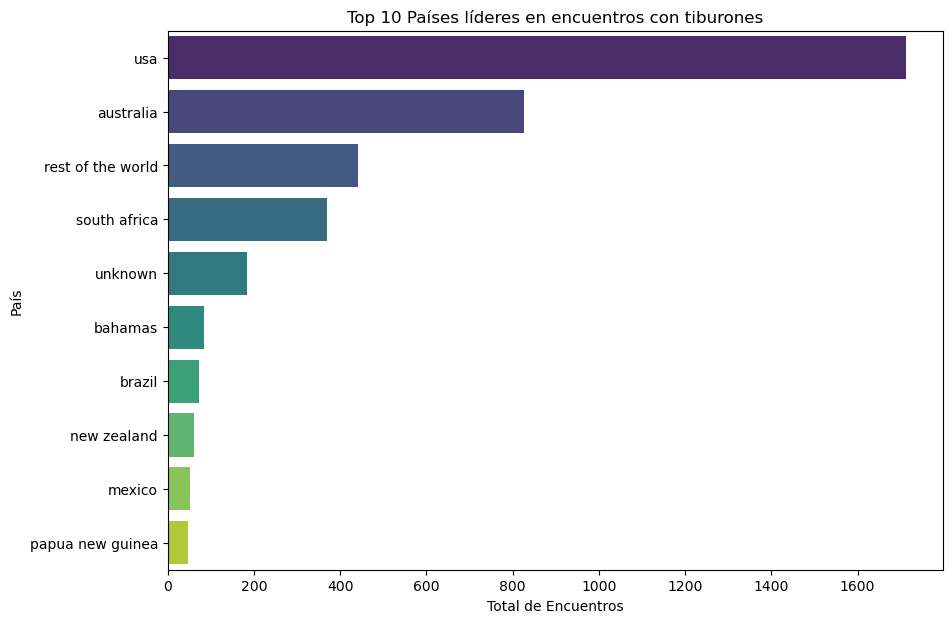

In [942]:
top_10_countries = df['country'].value_counts().nlargest(10).index


df_top_10 = df[df['country'].isin(top_10_countries)]

plt.figure(figsize=(10, 7))
sns.countplot(
    y='country',  
    data= df_top_10 ,
    order=top_10_countries, 
    palette='viridis'
)
plt.title('Top 10 Países líderes en encuentros con tiburones')
plt.xlabel('Total de Encuentros')
plt.ylabel('País')
plt.show()

/var/folders/jv/lpcmj8m91yggsl2fvg3tnx2w0000gn/T/ipykernel_15542/3364817248.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_fatality = df.groupby("country").agg(
/var/folders/jv/lpcmj8m91yggsl2fvg3tnx2w0000gn/T/ipykernel_15542/3364817248.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


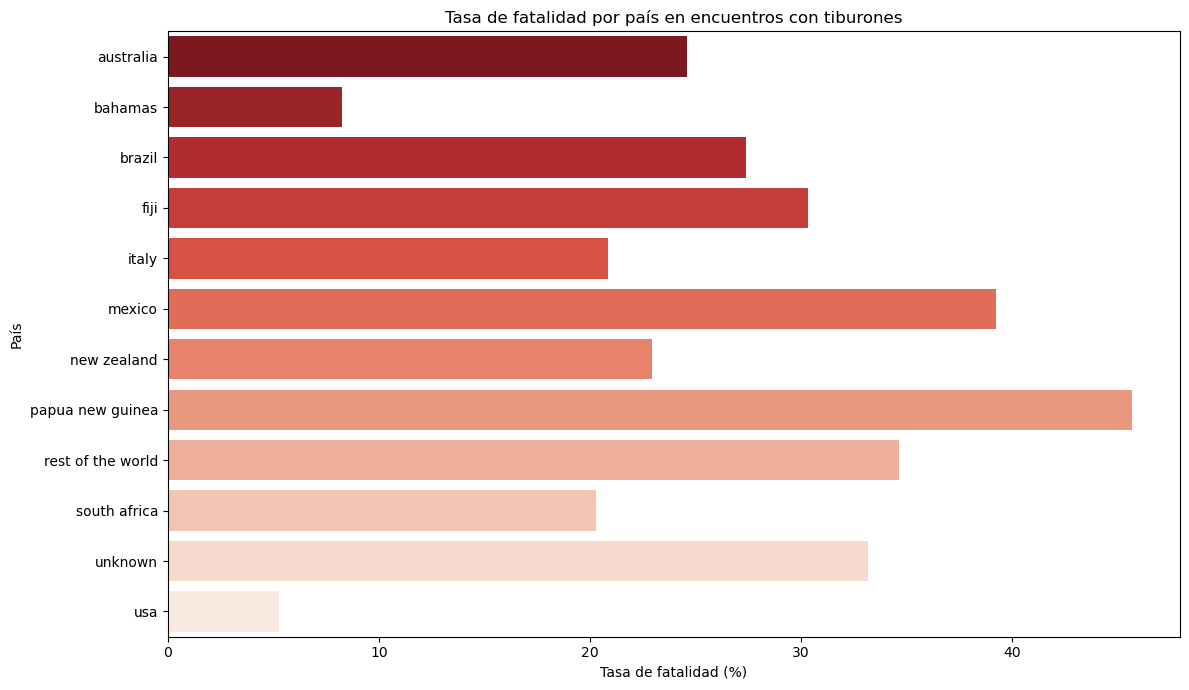

In [947]:
df_fatality = df.groupby("country").agg(
    total_incidents=("fatal_y/n", "count"),
    fatalities=("fatal_y/n", lambda x: (x.str.upper() == "Y").sum())
).reset_index()

# Calcular tasa de fatalidad
df_fatality["fatal_rate"] = (df_fatality["fatalities"] / df_fatality["total_incidents"]) * 100

# Ordenar por tasa de fatalidad
df_fatality = df_fatality.sort_values("fatal_rate", ascending=True)

# Gráfico de barras horizontal
plt.figure(figsize=(12, 7))
sns.barplot(
    x="fatal_rate",
    y="country",
    data=df_fatality,
    palette="Reds_r"
)
plt.xlabel("Tasa de fatalidad (%)")
plt.ylabel("País")
plt.title("Tasa de fatalidad por país en encuentros con tiburones")
plt.tight_layout()
plt.show()

/var/folders/jv/lpcmj8m91yggsl2fvg3tnx2w0000gn/T/ipykernel_15542/1008285568.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


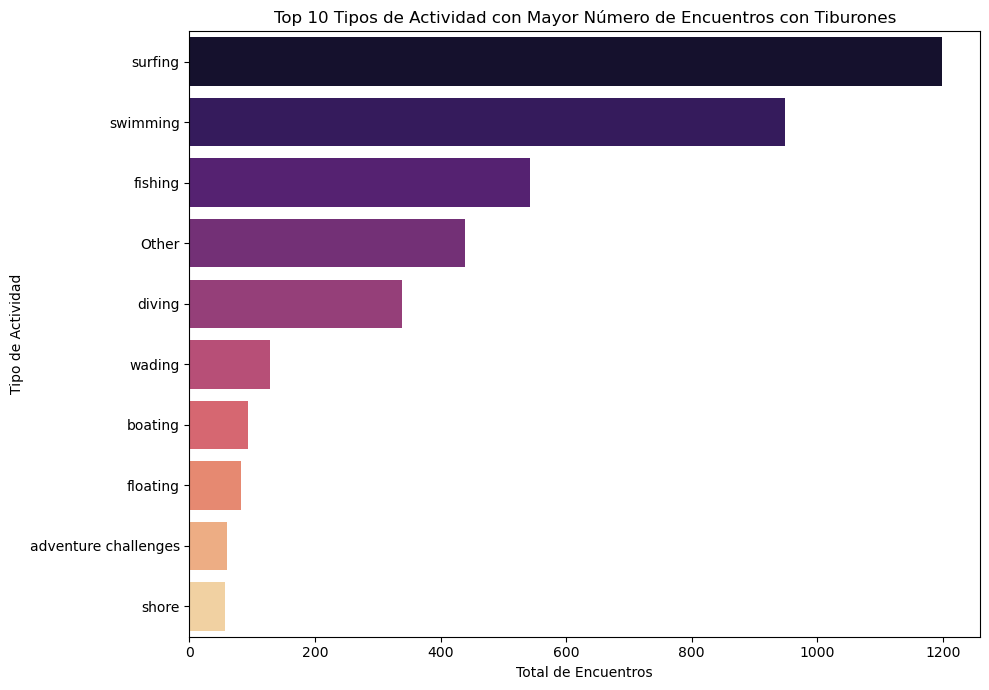

In [944]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calcular las 10 categorías de actividad con más registros
top_10_activities = df['activity_group'].value_counts().nlargest(10).index

# 2. Filtrar el DataFrame original para incluir solo esas actividades
# Esto es necesario para que el countplot solo cuente las categorías que nos interesan
df_top_10_activities = df[df['activity_group'].isin(top_10_activities)]

# 3. Crear el gráfico de barras horizontal ordenado
plt.figure(figsize=(10, 7))
sns.countplot(
    y='activity_group',  # Usar 'y' para barras horizontales
    data=df_top_10_activities,
    order=top_10_activities,  # Ordena las barras de mayor a menor frecuencia
    palette='magma' # Puedes cambiar la paleta de colores para hacerlo más llamativo
)

plt.title('Top 10 Tipos de Actividad con Mayor Número de Encuentros con Tiburones')
plt.xlabel('Total de Encuentros')
plt.ylabel('Tipo de Actividad')

# Ajustes finales para que el gráfico se vea bien
plt.tight_layout()
plt.show()

/var/folders/jv/lpcmj8m91yggsl2fvg3tnx2w0000gn/T/ipykernel_15542/1055773753.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


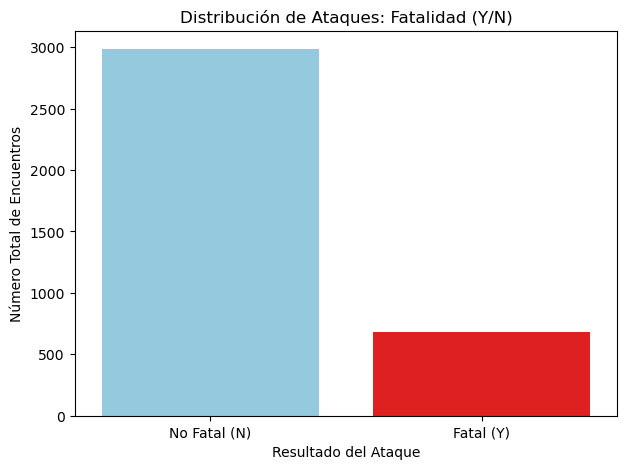

In [945]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.countplot(
    x='fatal_y/n',
    data=df,
    order=['N', 'Y'],  # Establece un orden lógico (No Fatal primero, luego Fatal)
    palette={'N': 'skyblue', 'Y': 'red'}  # Asigna colores para mayor impacto
)

plt.title('Distribución de Ataques: Fatalidad (Y/N)')
plt.xlabel('Resultado del Ataque')
plt.ylabel('Número Total de Encuentros')
plt.xticks(ticks=[0, 1], labels=['No Fatal (N)', 'Fatal (Y)']) # Asegura buenas etiquetas si hay 'Unknown'
plt.show()

In [946]:
# Agrupar por actividad y contar el número de registros
tabla_actividad = df.groupby("country").size().reset_index(name="encuentros")

# Ordenar de mayor a menor número de encuentros
tabla_actividad = tabla_actividad.sort_values("encuentros", ascending=False)

# Mostrar la tabla
print(tabla_actividad)

              country  encuentros
11                usa        1712
0           australia         826
8   rest of the world         442
9        south africa         370
10            unknown         184
1             bahamas          85
2              brazil          73
6         new zealand          61
5              mexico          51
7    papua new guinea          46
3                fiji          33
4               italy          24


/var/folders/jv/lpcmj8m91yggsl2fvg3tnx2w0000gn/T/ipykernel_15542/3681126791.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_actividad = df.groupby("country").size().reset_index(name="encuentros")
